# Валидация результатов

1. <a href="#1">Введение</a>
2. <a href="#2">Укрупняем группы</a>
3. <a href="#3">Разбитые по группам данные</a>
4. <a href="#4">Заключение</a>

<a name="1">_</a>
## Введение
Вы сделали всё, чтобы получить список тех сетей АЗС, с которыми Яндекс.Навигатору выгоднее начать сотрудничество.

**Чему вы научитесь:**

- строить столбчатые графики и круговые диаграммы;
- выборочно изменять значения в списке методом *where()*;
- писать цикл, который строит сразу много гистограмм.

**Вам предстоит:**

- объединить мелкие сети в группу «Другие»;
- построить гистограммы продолжительности заправки в каждой сети;
- получить финальный список крупных сетей АЗС.

**Постановка задачи:**

Перепроверьте реалистичность данных, чтобы подготовить финальный отчёт для руководства.

<a name="2">_</a>
## Укрупняем группы

In [ ]:
Перед тем как делать выводы, перепроверим реалистичность данных.

Наш отчёт выглядит так. Напомним, что достоверное типичное время заправки указано в `median_time`:

In [1]:
# код из предыдущих уроков
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')
data['local_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
) + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_station_stat = good_data.pivot_table(
    index="id", values="time_spent", aggfunc="median"
)

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first', 'count']
)
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values='time_spent', aggfunc=['median', 'count']
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

In [2]:
# print(final_stat)
final_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0
Бальзамин,134.508411,158.0,158.00,1.0
Бархатцы,145.300328,181.5,181.50,1.0
Бегония,163.200647,195.0,190.00,3.0
Белоцветник,100.818966,154.0,154.00,1.0


Данные бывают разной природы, и для всяких наблюдений есть подходящие графики. Например, если нужно продемонстрировать доли от 100%, строят круговую диаграмму. В методе `plot()` задают тип: `kind='pie'` (англ. pie chart — «диаграмма-пирог», похожа на круглый пирог, поделённый на дольки). Столбец с данными для диаграммы указывают в параметре y метода `plot()`.

Нам же нужно отразить на графике факт, что каждая сеть АЗС — это отдельный объект, никак не связанный с ближайшими соседями в рейтинге. Для анализа таких наблюдений лучше подходит столбчатый график, он подчёркивает изолированность данных.

Столбчатый график строят методом `plot()`, параметром передают тип графика: `kind='bar'` (англ. bar chart, «столбчатая диаграмма»). Однако график может быть не наглядным, ведь сетей много, и лишь несколько из них — крупные. Лучше объединить все мелкие сети и отрисовать как один столбец.

Данные по малым сетям можно просто отбросить, но полезнее сгруппировать их в «сеть» под названием «Другие», то есть сделать **выборочное переименование**. Так вы и данные не потеряете, и покажете отличие малых сетей от старших братьев.

Выборочно изменяют значения методом `where()` (от англ. «где»). Ему передают **2 параметра**: условие для булева массива и новые значения. Если условие равно `True`, соответствующее ему значение не изменится, а если `False` — поменяется на второй параметр метода. Возьмём, к примеру, список покупок:

Мы написали для булева массива условие, проверяющее, не оказался ли элемент списка хамоном: `shopping != 'хамон'`. Получили массив вида: `[True, False, True, True, True]`. Строки со значением True не изменились, а хамон поменялся на значение `'обойдусь'`.

При объединении данных случается отбрасывать пустые значения. Вы знакомы с методом `dropna()` из вводного курса. Напомним, что он удаляет пропущенные значения из датафрейма. Когда нужно удалить строки с пропусками в конкретном столбце, его название передают параметру `subset` метода `dropna()`:

### Задача 1/7

Постройте столбчатый график длительности заправки на каждой сети АЗС по наилучшей оценке — медиане, упорядочив сети по возрастанию времени. Задайте размер графика 10 на 5 дюймов.
>Отсортируйте значения таблицы `final_stat` методом `sort_values` по медианному времени.
<br>Постройте график методом `plot()`. Передайте параметром `y` название столбца, по которому будет строиться график. Задайте столбчатый тип графика. В параметре `figsize` укажите размеры 10 на 5 дюймов.

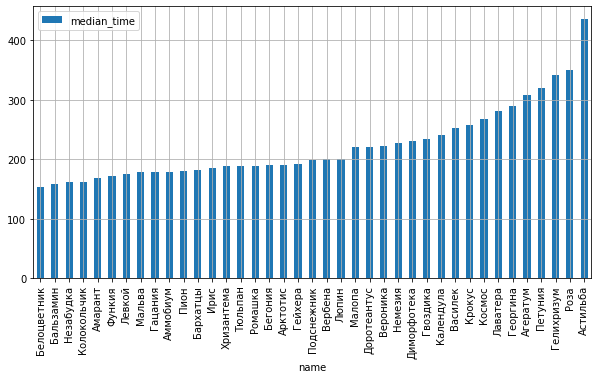

In [3]:
final_stat = (
    final_stat
    .dropna(subset=['median_time'])
    .sort_values('median_time')
    .plot(y = ['median_time'], figsize = (10, 5), grid = True, kind = 'bar')
)

Хорошо видно, как различаются сети. Есть группа сетей, где заправляют быстрее 200 секунд, и группа более медлительных конкурентов с диапазоном 200-350 секунд. Утешительный приз в конкурсе"Скорость без границ" получает сеть "Астильба", где ухитряются заправлять дольше 400 секунд. Наверное, там есть подкачка, телевизор и вкусный кофе.

А сетям с недостоверными данными остались только пустые значения. Избавимся от таких сетей методом `dropna()`

### Задача 2/7
Постройте столбчатый график медианной продолжительности заправки на каждой сети, упорядочив их по возрастанию времени. Пустые значения отбросьте методом `dropna()`. Задайте размер графика 10 на 5 дюймов. Добавьте линии сетки. Всё это сделайте в одно действие, не меняя переменную `final_stat`.
>Отбросьте пустые значения методом `dropna()`, передав параметр `subset=['median_time']`. Отсортируйте значения по медианному времени.<br>
В `plot()` передайте параметром `y` название столбца, по которому будет построен график. Задайте столбчатый тип графика. В параметре `figsize` укажите размеры 10 на 5 дюймов. Присвойте значение `True` параметру `grid`, отвечающему за линии сетки.

In [32]:
# прекод
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')
data['local_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
) + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_station_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
stat['good_time_spent'] = good_stat['time_spent']

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
name_stat['good_time_spent'] = good_name_stat['time_spent']

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first', 'count']
)
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values='time_spent', aggfunc=['median', 'count']
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

<AxesSubplot:xlabel='name'>

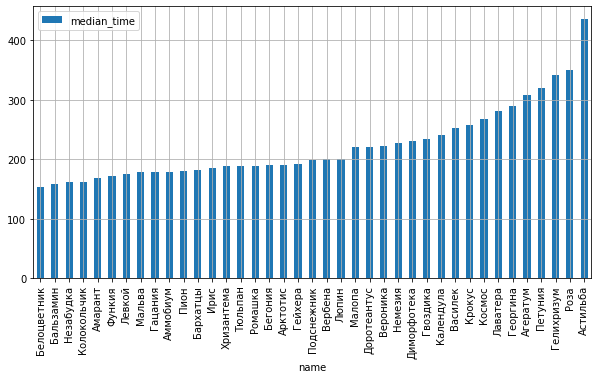

In [33]:
# можно не разбивать на строки
final_stat.dropna(
    subset = ['median_time']
).sort_values(
    'median_time'
).plot(
    y = 'median_time', kind = 'bar', grid = True, figsize = (10,5)
)

Теперь ничего лишнего. Хорошо видна условная граница, разделяющая "быстры" и "медленные" сети.

Что дает этот факт? Клиентам "быстрых" АЗС оплата заправки через Яндекс.Навигатор вряд ли принесет много ценности. Они и так заправляются и платят быстро. А вот клиентам АЗС, чьи процессы отлажены не так хорошо, Я.Навигатор поможет проводить меньше времени на станции, при этом сами АЗС могли бы значительно улучшить показатели.

От аналитика ждут, что он укажет, кого "избрать" ключевым партнером. А какая "медленная" сеть всех крупнее, всех масштабней и виднее?

### Коды задач 1/7 и 2/7 очень похожи 
**Комментарий от поддержки:**

Во второй задаче вам нужно отбросить пустые значения в столбце `median_time`, а также добавить сетку. В первом варианте нужно отобразить пустые значения, а при ваших вариантах их нет. Видим, что оба варианта похожи, но в первом вы меняете значение `final_stat`.

<center>~~~~~</center>

### Задача 3/7
Выявите самые крупные сети — постройте гистограмму числа АЗС внутри сетей. Поделите значения на 100 корзин. Все необходимые данные в таблице `final_stat`.
>Найдите в `final_stat` столбец, где указано число АЗС в сети. Постройте гистограмму методом `hist()`. Передайте первым параметром название столбца, укажите bins=100.

In [6]:
# print(final_stat)
final_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0
Бальзамин,134.508411,158.0,158.00,1.0
Бархатцы,145.300328,181.5,181.50,1.0
Бегония,163.200647,195.0,190.00,3.0
Белоцветник,100.818966,154.0,154.00,1.0


array([[<AxesSubplot:title={'center':'stations'}>]], dtype=object)

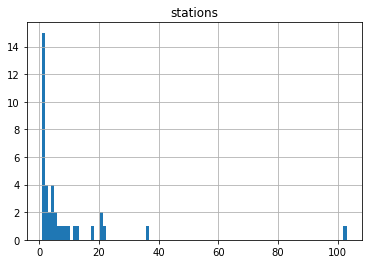

In [7]:
# первым параметром гистограммы задаю столбец 'stations'
final_stat.hist('stations', bins = 100)

"Сеть" — это звучит гордо! Особенно когда в сети всего одна АЗС. У нас таких "гордых" целых 15. Есть группа таких, у которых меньше 10 станций. Есть и отдельные большие сети.

Крупные рыбы интересуют нас в первую очередь, а мальков нужно собрать в одной группе.

### Задача 4/7
Выберите из `final_stat` сети, в которых более 10 АЗС. Результат сохраните в таблице `big_nets_stat`. Выведите её на экран.
>Методом `query()` получите выборку сетей АЗС с количеством станций больше 10.

In [8]:
big_nets_stat = final_stat.query('stations > 10')
#print(big_nets_stat)
big_nets_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Василек,268.849897,264.0,252.00,103.0
Гейхера,167.445947,204.0,192.00,12.0
Календула,207.357323,254.0,240.00,36.0
Колокольчик,119.131564,161.0,161.00,21.0
Люпин,235.440937,186.0,200.00,13.0
Мальва,136.562234,182.0,177.75,22.0
Немезия,186.535207,226.0,227.50,21.0
Роза,260.877217,315.0,350.00,18.0


Вы получили большую восьмерку. Это лучше, чем двадцатка — проще договориться.

### Задача 5/7
Создайте в `station_stat_full` новый столбец `'group_name'`, где для сетей АЗС из `big_nets_stat` названия останутся прежними, а имена остальных измените на 'Другие'. Распечатайте первые 5 строк `station_stat_full`.
>Примените метод `where()` к столбцу `'name'` из `station_stat_full`. Первым параметром передайте условие булева массива, где `True` соответствует именам крупных сетей, которые должны остаться без изменений. Список таких сетей — это `big_nets_stat.index`. Для проверки вхождения имени в список примените метод `isin()`. Вторым параметром `where()` передайте новое название 'Другие'.

>Выведите на экран первые значения `station_stat_full` методом `head()`.

In [29]:
station_stat_full['group_name'] = (
   station_stat_full['name']
   .where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
)
#print(station_stat_full.head())
station_stat_full.head()

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василек,164,234.5,Василек
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василек,157,289.0,Василек


Да, иногда аналитические выводы неприлично похожи на сюжеты бульварных романов: "Василек остался прежним, а Вероника стала другой". Не обращайте внимания, вы-то все правильно сделали.


### Задача 6/7
Соберите таблицу с потенциальными ключевыми партнёрами. Повторите знакомые вычисления, на этот раз *группируя АЗС не по name*, а *по group_name*.

Создайте переменную `stat_grouped`. Сперва сделайте срез по `station_stat_full`: выберите только те АЗС, на которых было более 30 заправок. Затем по этой выборке постройте сводную таблицу расчёта медианной продолжительности заправки: сгруппируйте по `'group_name'`, значением укажите `'time_spent'`, параметру `aggfunc` передайте список функций `'median'` и `'count'`.

Дайте имена `'time_spent'` и `'count'` новоиспечённым столбцам в `stat_grouped`.

Отсортируйте `stat_grouped` по возрастанию значений столбца `'time_spent'`. Укажите параметр, необходимый для сохранения результатов сортировки в `stat_grouped`.

Распечатайте значения `stat_grouped`.
>Осуществите срез данных `station_stat_full` условием `query('count > 30')`.<br>
Постройте сводную таблицу по выборке, полученной после среза. В `index` передайте `'group_name'`, в `values` — `'time_spent'`, а в `aggfunc` — список `['median', 'count']`.<br>
Атрибуту `columns` таблицы `stat_grouped` передайте список из новых названий столбцов: `['time_spent', 'count']`.<br>
Отсортируйте значения `stat_grouped` по возрастанию столбца `'time_spent'`. В параметре `inplace` сохраните значение `True`.

In [30]:
stat_grouped = station_stat_full.query('count > 30').sort_values(by = 'time_spent', ascending = False)
stat_grouped = stat_grouped.pivot_table(index = 'group_name', values = ['time_spent'], aggfunc = ['median', 'count'])
stat_grouped.columns = ['time_spent', 'count']
stat_grouped.sort_values(by = ['time_spent'], ascending = True, inplace = True)
#print(stat_grouped)
stat_grouped

,time_spent,count
group_name,,
Колокольчик,161.00,21
Мальва,177.75,22
Гейхера,192.00,12
Люпин,200.00,13
Другие,208.75,104
Немезия,227.50,21
Календула,240.00,36
Василек,252.00,103
Роза,350.00,18


Медленнее всего обслуживают в "Розе". "Василек", "Календула" и "Немезия" тоже не могут особо похвастаться. Надо что-то делать с уровнем сервиса. Если долго смотреть на машину с пустым бензобаком, можно увидеть, как она уезжает заправляться к конкурентам.

### Задача 7/7
Постройте круговую диаграмму с числом АЗС в каждой сети. Задайте ей размер 8x8 дюймов.
>Примените метод plot() к данным stat_grouped. Передайте параметру y столбец с числом АЗС: 'count'. Задайте круговой тип диаграммы kind='pie'. Укажите размер 8 на 8 дюймов в параметре figsize.

<AxesSubplot:ylabel='count'>

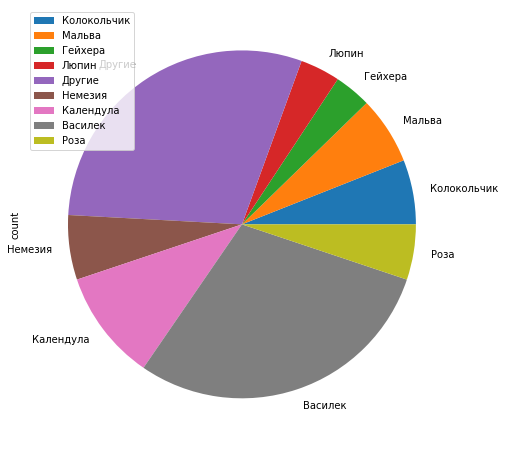

In [31]:
# сейчас случится магия
stat_grouped.plot(y='count', kind='pie', figsize=(8, 8))

Мы получили финальный список наиболее интересных АЗС:
1. "Роза". Самая медленная среди крупных сетей.
2. "Василек". Вторая по медлительности, но очень крупная по размеру сеть АЗС.
3. "Календула". Близка по времени к "Васильку" и вторая по величине.
4. "Немезия". Последняя из медленных и сравнительно крупных АЗС.

<a name="3">_</a>
## Разбитые по группам данные

Вы получили список, готовый лечь на стол начальству. Страшновато, если честно. Давайте ещё разок перепроверим. Вдруг на среднюю продолжительность заправки у ваших избранников повлияли аномально короткие заезды? Посмотрим гистограммы отдельно для каждой сети.

Переберём все сети и построим их гистограммы. Звучит трудоёмко, но это можно **автоматизировать**! Например, в цикле. Создадим столбец `'group_name'` и переберём названия групп так: `good_data['group_name'].unique()`. Затем получим срез из `good_data` методом `query()` и построим гистограмму по отфильтрованным данным. Однако в Pandas есть метод `groupby()`, автоматически перебирающий уникальные значения. Передадим ему столбец, а он вернёт последовательность пар: значение столбца — срез данных с этим значением.

Посмотрим, как это работает. Напишем цикл, возвращающий частоту появления имени разработчика в IT-отделе:

In [26]:
IT_names = pd.DataFrame(
    {
        'name': ['Саша', 'Саша', 'Саша', 'Игорь', 'Игорь', 'Максим', 'Максим'],
        'surname': [
            'Иванов',
            'Попов',
            'Сидоров',
            'Смирнов',
            'Крылов',
            'Курепов',
            'Максимов',
        ],
    }
)
print(IT_names)
print()
for developer_name, developer_data in IT_names.groupby('name'):
    print(
        'Имя {} встречается {} раза'.format(
            developer_name, len(developer_data)
        )
    )

     name   surname
0    Саша    Иванов
1    Саша     Попов
2    Саша   Сидоров
3   Игорь   Смирнов
4   Игорь    Крылов
5  Максим   Курепов
6  Максим  Максимов

Имя Игорь встречается 2 раза
Имя Максим встречается 2 раза
Имя Саша встречается 3 раза


Сгруппировали данные из датафрейма `IT_names` по совпадениям столбца `'name'`. На каждом шаге мы получали имя разработчика — `developer_name` и срез датафрейма по этому имени — `developer_data`. После чего нашли количество элементов каждой «именной» выборки.

Метод `groupby()` позволяет сразу производить простые вычисления над элементами группы. Например, применив метод `count()`, мы добьёмся аналогичного результата. Получим список имён с их частотой:

In [13]:
print(IT_names.groupby('name').count())

        surname
name           
Игорь         2
Максим        2
Саша          3


Результат работы функции, применённой к `groupby()`, становится аналогом `pivot_table()`. Однако нас интересует перебор значений в цикле. Построим гистограммы для каждой из сетей.

### Задача 1/3
Создайте в `good_data` новый столбец `'group_name'`, где сетям из `big_nets_stat` оставьте их оригинальные имена, а остальные сети переименуйте на `'Другие'`. Распечатайте первые 5 строк `good_data`.
>Примените метод `where()` к столбцу `'name'` из `good_data`. Первым параметром передайте условие булева массива, где `True` соответствует именам крупных сетей, которые должны остаться без изменений. Список таких сетей — это `big_nets_stat.index`. Для проверки вхождения имени в список крупных сетей примените метод `isin`. Вторым параметром `where()` передайте новое название `'Другие'`.<br>
Распечатайте значения `good_data`, возвращаемые методом `head()`.

In [25]:
good_data['group_name'] = (good_data['name'].where(good_data['name'].isin(big_nets_stat.index), 'Другие'))
#print(good_data.head())
good_data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow,group_name
0,20180406T165358,76144fb2,98.0,Василек,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False,Василек
2,20180403T172824,76144fb2,220.0,Василек,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False,Василек
6,20180402T082321,76144fb2,555.0,Василек,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False,Василек
7,20180407T003408,76144fb2,286.0,Василек,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False,Василек
9,20180405T131939,76144fb2,248.0,Василек,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False,Василек


Вы создали group_name, теперь с ним можно проделывать разное волшебство.<br>
Масса возможностей хранить одно в другом:<br>
group_name,  в group_data, <br>
group_data в цикле for - in,<br>
игла в яйце, яйцо в утке,<br>
утка в зайце, заяц в шоке.

### Задача 2/3
Методом `hist()` постройте гистограмму продолжительности заправки для каждой сети отдельно (напомним, что все небольшие АЗС в общей группе "Другие"). Возьмите данные из `good_data`. Гистограмму разбейте на 50 корзин.
>Создайте цикл, перебирающий сгруппированные по `'group_name'` данные из `good_data`.<br>
Названию и срезу данных, которые возвращает `groupby()` на каждом шаге цикла, дайте имена `name` и `group_data`. Внутри цикла вызовите метод `hist()` к данным `group_data`.<br>
Параметрами метода `hist()` передайте столбец `'time_spent'`, по которому нужно построить гистограмму, и bins=50.

In [19]:
# напоминаю прекод
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')
data['local_time'] = pd.to_datetime(
    data['date_time'], format='%Y-%m-%dT%H:%M:%S'
) + pd.Timedelta(hours=3)
data['date_hour'] = data['local_time'].dt.round('1H')
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000

too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_station_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)

name_stat = data.pivot_table(index='name', values='time_spent')
good_name_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
name_stat['good_time_spent'] = good_name_stat['time_spent']

stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median'
)
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first', 'count']
)
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_station_stat)

good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values='time_spent', aggfunc=['median', 'count']
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

big_nets_stat = final_stat.query('stations > 10')
station_stat_full['group_name'] = station_stat_full['name'].where(
    station_stat_full['name'].isin(big_nets_stat.index), 'Другие'
)

stat_grouped = station_stat_full.query('count > 30').pivot_table(
    index='group_name', values='time_spent', aggfunc=['median', 'count']
)
stat_grouped.columns = ['time_spent', 'count']

good_data['group_name'] = good_data['name'].where(
    good_data['name'].isin(big_nets_stat.index), 'Другие'
)


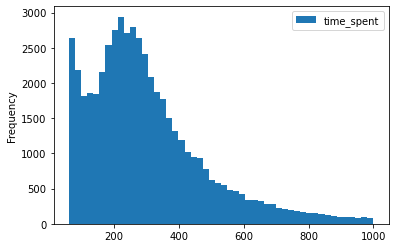

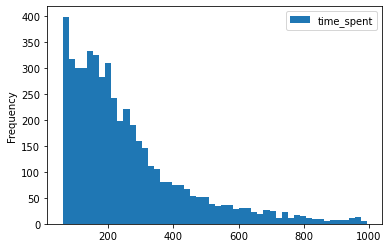

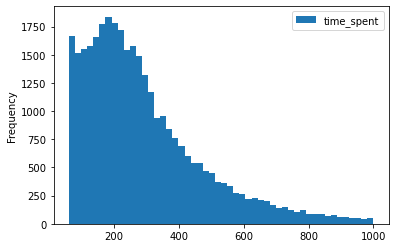

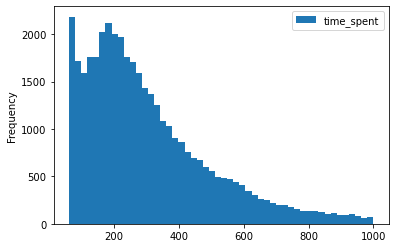

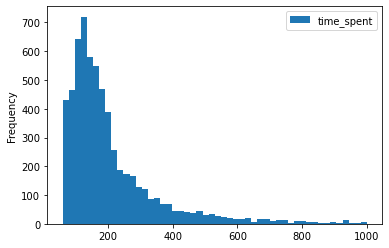

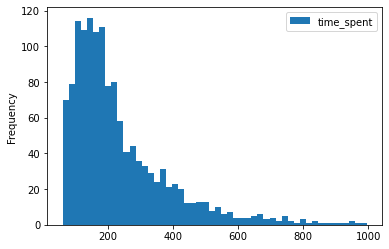

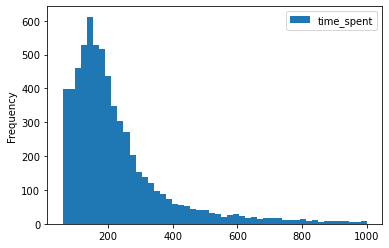

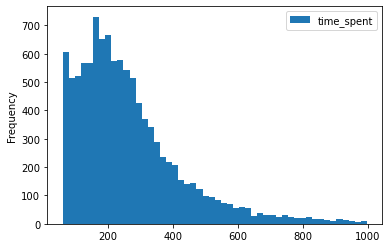

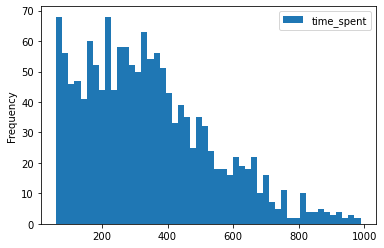

In [23]:
for group_name, group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', y='time_spent', bins=50)

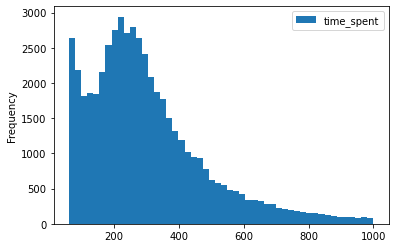

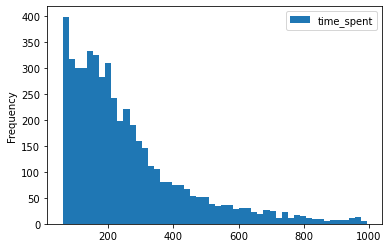

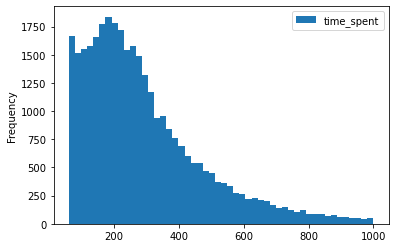

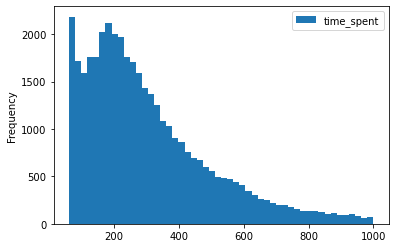

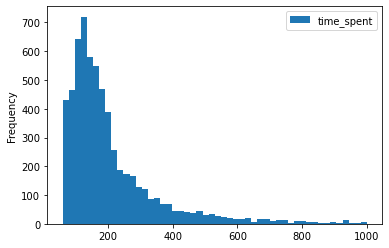

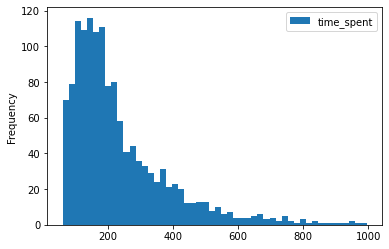

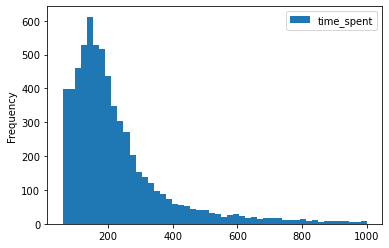

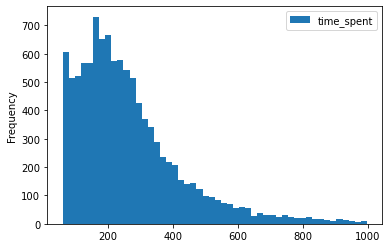

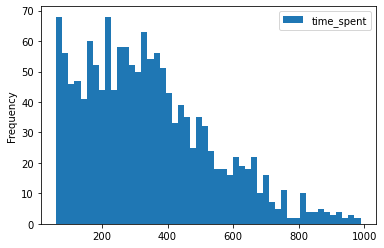

In [22]:
# или так:
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(y='time_spent', kind='hist', bins=50)

Ловкость автоматизации и никакого ручного перебора! Вы получили все гистограммы. Красота. Не хватает самой малости: **названий сетей**.

### Задача 3/3
Методом `plot()` c параметром `kind='hist'` постройте гистограмму продолжительности заправки для каждой сети отдельно (напомним, что все малые АЗС — в общей группе "Другие"). Возьмите данные из `good_data`. Столбец, по значениям которого гистограмму следует построить, передайте параметру `y`, а переменную с названиями графиков параметру `title`. Гистограмму разбейте на 50 корзин.
>Создайте цикл, перебирающий сгруппированные по `'group_name'` данные из `good_data`.<br>
Названию и срезу данных, которые возвращает `groupby()` на каждом шаге цикла, дайте имена `name` и `group_data`. Внутри цикла вызовите метод `plot()` к данным `group_data`. Параметру `y` передайте столбец `'time_spent'`, в параметре `title` укажите `name` (**без кавычек, это переменная!**). В `kind` укажите тип графика `'hist'`, а в `bins` — `50`.

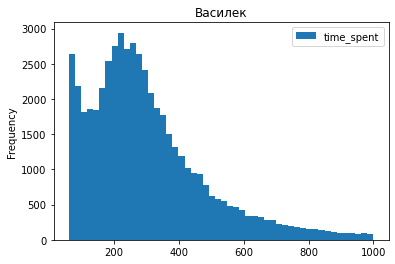

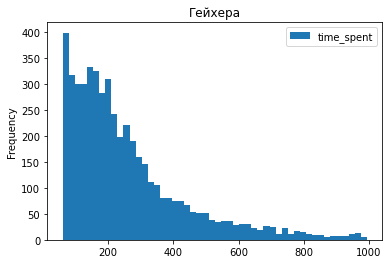

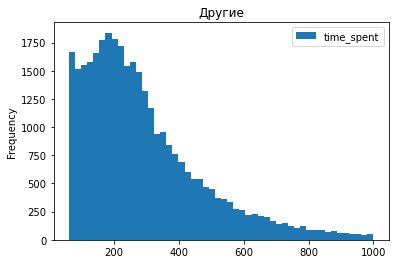

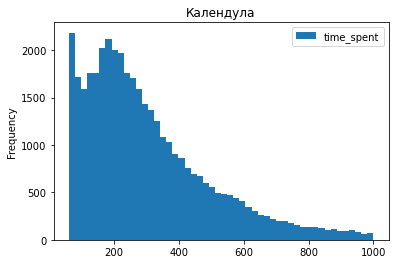

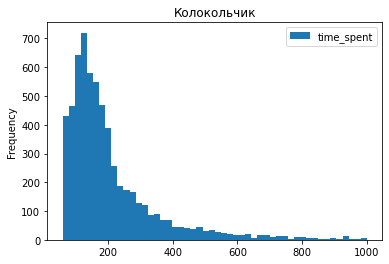

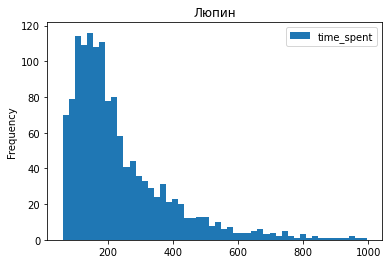

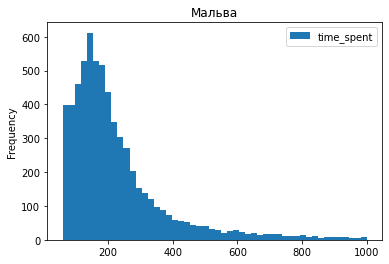

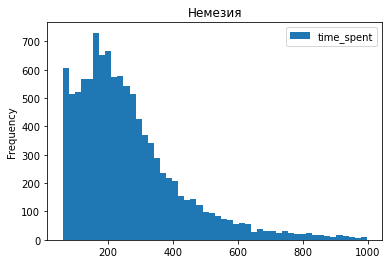

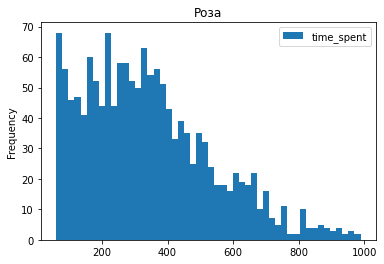

In [24]:
# добавляем title=name
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(y='time_spent', title=name, kind='hist', bins=50)

На этот раз вы боялись зря. Распределение сетей большой восьмерки похожи на пуассоновское. Если бы у них был огромный пик на коротких временах — это было бы плохо. А так посчитанные нами средние значения действительно хорошо передают реальное время заправки. Квалифицированный аналитик спит крепко!

<a name="4">_</a>
## Заключение

В этой теме вы перепроверяли реалистичность данных: строили графики, переименовывали, группировали и строили новые графики.
    
У многих сетей АЗС явно обнаруживается аномальный пик на коротких поездках. Но в основном распределение ожидаемой формы, а значит медиана хорошо передаёт характерное время заправки.

Вы действительно выявили много долгих заправок в самых медленных сетях АЗС («Роза», «Календула», «Василёк», «Намезия»). Причём форма распределения достаточно плавная: не походит на явную аномалию на продолжительных временах заправки.<br>
Данные действительно реалистичны — значит, курс пройден не зря.


**Где ещё почитать про группировку данных**
    
<a href="https://habr.com/ru/company/ods/blog/322626/">Группировка с groupby, раздел "Группировка данных"</a><br>
<a href="https://smysl.io/blog/pandas/">Примеры groupby</a>

# Заключение
Поздравляем! Вы прошли длинный путь: от общего представления о данных до чёткого понимания, какие из них надёжные, а какие — нет. Научились проверять их на каждом этапе, смотреть типичные значения, выбросы и распределения.

Ключевая задача курса решена: вычислили, сколько времени водители тратят на заправку в каждой сети АЗС. Несмотря на довольно серьёзные проблемы в исходных данных, вы составили рейтинг станций и сформировали баг-репорт. Когда коллеги вернут очищенные данные, ваши выводы станут точнее, но методика уже есть!

**Вы научились:**

- строить графики различными методами: hist(), boxplot(), plot();
- получать срезы данных;
- выборочно менять значения методом where();
- присваивать значения по индексам и строкам;
- объединять данные методом join();
- определять и интерпретировать взаимосвязи различных данных;
- автоматизировать процесс построения графиков.

**Вопросы для самопроверки**
* Какие инструменты для первичного знакомства с данными вы знаете?
* Какими способами объединяют данные?
* Какими методами изучают взаимосвязи величин?
* Какие существуют способы получения среза данных и какой из них используется в различных случаях?
* Как поменять значения выборочно?

**Что дальше**
Аналитик работает с большим количеством гипотез, которые проверяются статистическими методами. В следующем разделе вы узнаете, **как статистика и теория вероятностей помогают решать задачи бизнеса**.